# **Base de datos**
### **1. Información del dataset**
**Nombre:** WAY-EEG-GAL. <br>
**Participantes:** 12 personas. <br>
**Tarea experimental:** Agarre y levantamiento de objetos a diferentes pesos. <br>
**Señales de interés:** Señales EMG de músculos del brazo y la mano. <br>
**Número de canales:** 5 por cada participante. <br>
**Frecuencia de muestreo:** 500 Hz. <br>
**Formato de archivos:** .mat . <br>
**Duración de muestras:** 3 - 5 segundos. <br>

**Músculos sensados:**
- Flexor superficial de los dedos (FDS)
- Extensor común de los dedos (EDC)
- Braquiorradial (BR)
- Deltoides anterior (AD)
- Primer interóseo dorsal (FDI)  

**Referencia del dataset:** Luciw, M., Jarocka, E., & Edin, B. (2014). Multi-channel EEG recordings during 3,936 grasp and lift trials with varying weight and friction. Scientific Data, 1, 140047. https://doi.org/10.1038/sdata.2014.47 <br>

### **2. Relevancia**
El análisis de la activación muscular durante tareas de agarre y levantamiento de objetos permite tener una referencia cercana a los gestos de levantamiento de pesas y flexión-extensión del antebrazo, lo que hace que los datos sean útiles para validar algoritmos de detección de ejecución.

### **3. Librerías importadas**
- NumPy → manejo de matrices y operaciones numéricas sobre las señales EMG.
- Matplotlib → graficar las señales crudas y resultados del análisis.
- SciPy → cargar archivos .mat, aplicar filtros y procesar señales.
- NeuroKit2 → preprocesamiento y extracción rápida de características de EMG.

### **4. Código para la extracción de datos de muestra (Sujeto 1)**

In [28]:
## Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import welch

## Cargar archivo
ws = loadmat("data/WS_P1_S1.mat", squeeze_me=True, struct_as_record=False)["ws"]
w1 = ws.win[0]

# Array de señal emg y tiempo
emg1 = np.asarray(w1.emg)
t1   = np.asarray(w1.emg_t).ravel()

# Nombres de músculos
muscles = ["Flexor superficial de los dedos (FDS)",
    "Extensor común de los dedos (EDC)",
    "Braquiorradial (BR)",
    "Deltoides anterior (AD)",
    "Primer interóseo dorsal (FDI)"]


#### 1. Visualización de señales crudas
Permite verificar la calidad de las señales y su comportamiento temporal.

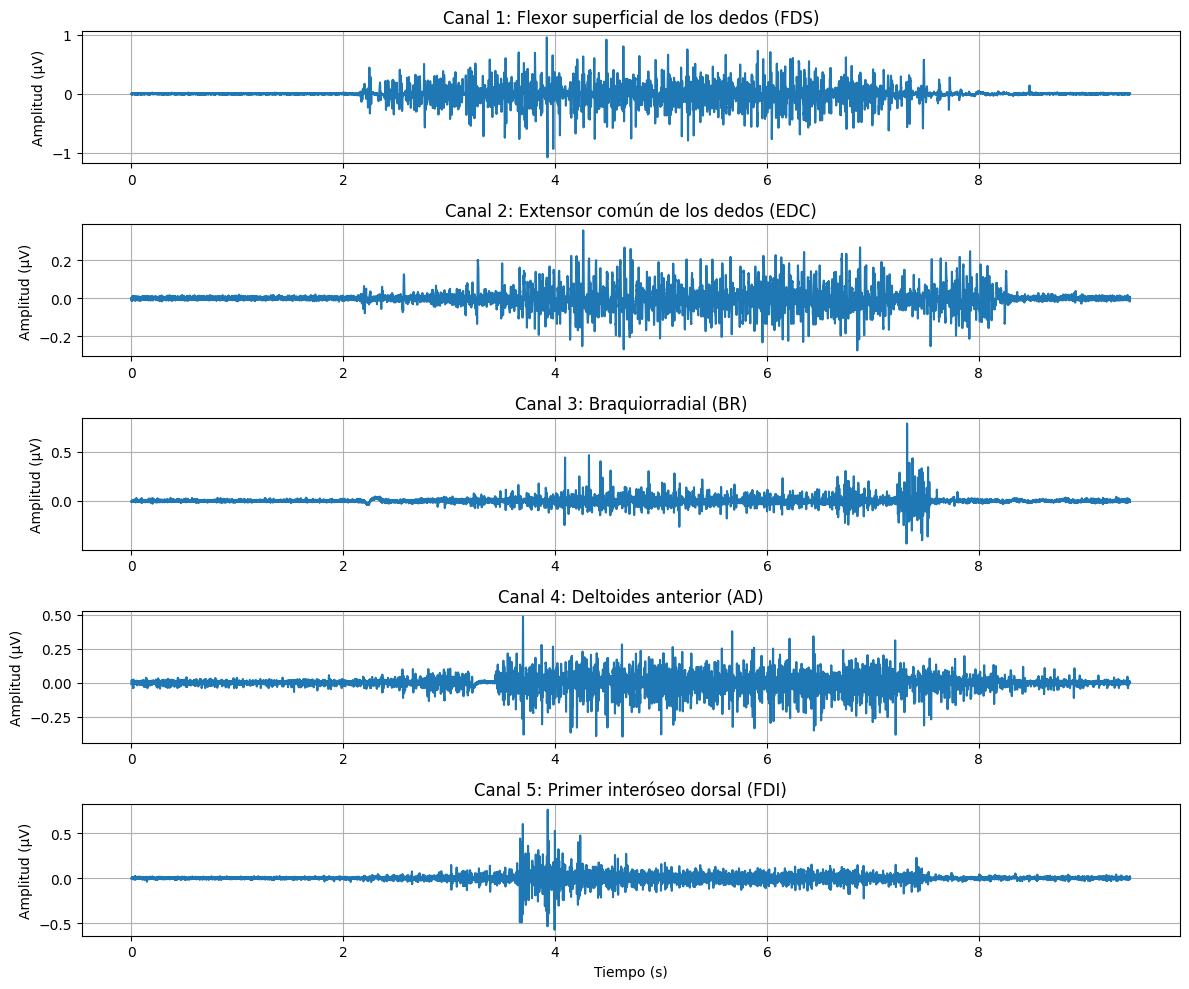

In [29]:
# 1. Visualización de señales crudas
n_channels = emg1.shape[1]
plt.figure(figsize=(12, 2*n_channels))
for i in range(n_channels):
    plt.subplot(n_channels, 1, i+1)
    plt.plot(t1, emg1[:, i])
    plt.ylabel("Amplitud (µV)")
    plt.grid(True)
    plt.title(f"Canal {i+1}: {muscles[i]}")
plt.xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()

#### 2. Estadísticas básicas
Cuantifican la magnitud y variabilidad de la activación muscular, útiles para la comparación entre músculos y condiciones de carga.

In [30]:
# 2. Estadísticas básicas por canal
print("Estadísticas básicas por canal (µV): \n")
for i, name in enumerate(muscles):
    sig = emg1[:, i]
    print(f"{name}: \n Media = {np.mean(sig):.3f}, \n Std = {np.std(sig):.3f}, \n Min = {np.min(sig):.3f}, \n Max = {np.max(sig):.3f} \n")

Estadísticas básicas por canal (µV): 

Flexor superficial de los dedos (FDS): 
 Media = 0.000, 
 Std = 0.137, 
 Min = -1.075, 
 Max = 0.956 

Extensor común de los dedos (EDC): 
 Media = 0.000, 
 Std = 0.055, 
 Min = -0.275, 
 Max = 0.357 

Braquiorradial (BR): 
 Media = 0.000, 
 Std = 0.040, 
 Min = -0.434, 
 Max = 0.787 

Deltoides anterior (AD): 
 Media = -0.000, 
 Std = 0.057, 
 Min = -0.397, 
 Max = 0.486 

Primer interóseo dorsal (FDI): 
 Media = -0.000, 
 Std = 0.044, 
 Min = -0.574, 
 Max = 0.760 



#### 3.  Valor RMS (Root Mean Square) por canal

In [31]:
# 3. RMS (Root Mean Square) por canal
rms_vals = [np.sqrt(np.mean(emg1[:, i]**2)) for i in range(n_channels)]
print("\nRMS por canal (µV):\n")
for name, rms in zip(muscles, rms_vals):
    print(f"{name}: {rms:.3f}")


RMS por canal (µV):

Flexor superficial de los dedos (FDS): 0.137
Extensor común de los dedos (EDC): 0.055
Braquiorradial (BR): 0.040
Deltoides anterior (AD): 0.057
Primer interóseo dorsal (FDI): 0.044


#### 4.  Señales rectificadas (valor absoluto)
Facilita la observación de la envolvente de la señal y permite una mejor visualización del comportamiento.

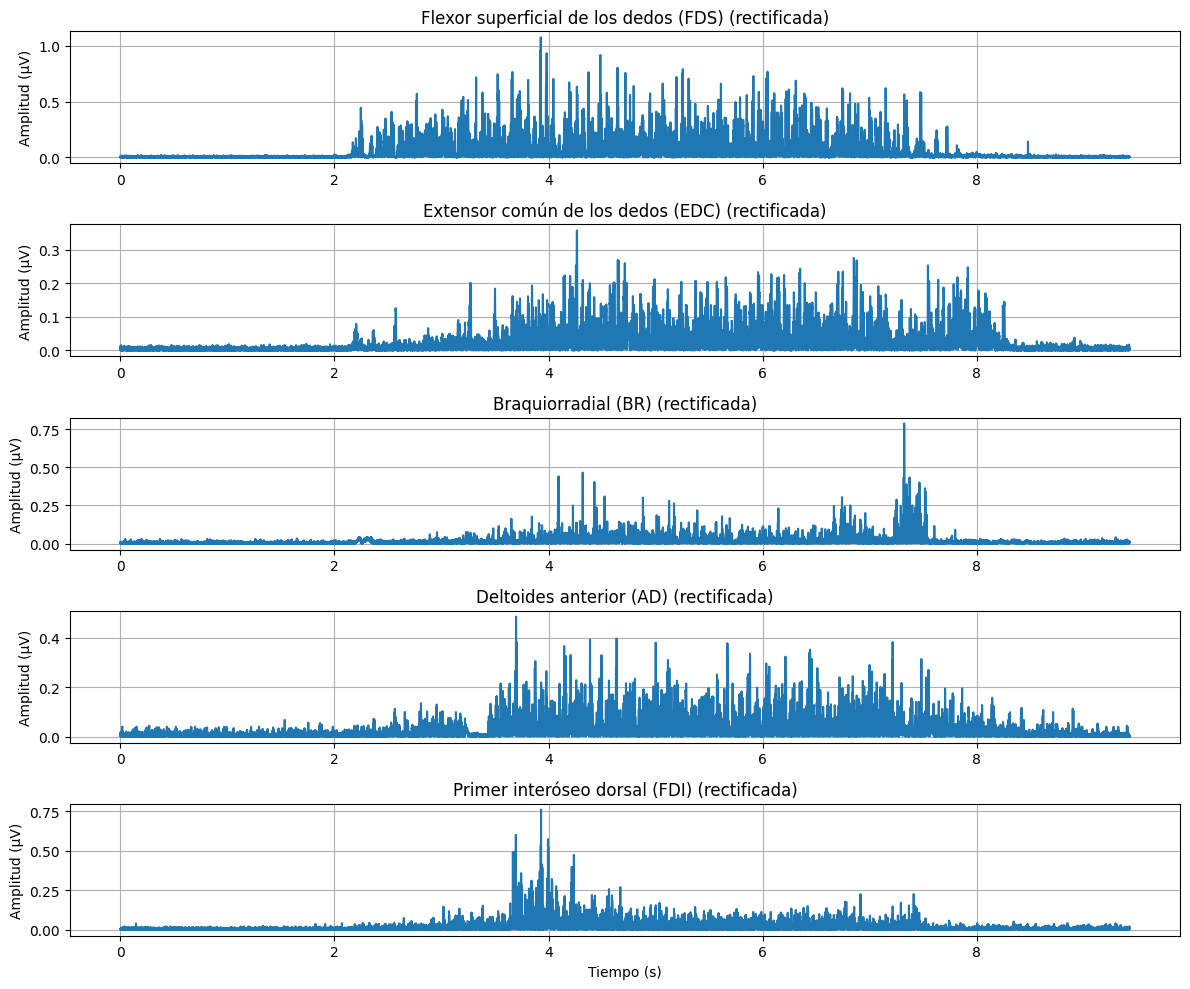

In [32]:
# 4. Señales rectificadas (valor absoluto)
plt.figure(figsize=(12, 2*n_channels))
for i in range(n_channels):
    plt.subplot(n_channels, 1, i+1)
    plt.plot(t1, np.abs(emg1[:, i])) # Se aplica valor absoluto
    plt.ylabel("Amplitud (µV)")
    plt.grid(True)
    plt.title(f"{muscles[i]} (rectificada)")
plt.xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()

#### 5.  Espectro de potencia (Welch)
Muestra la distribución de energía en frecuencia, relacionada con la fatiga y el control neuromuscular.

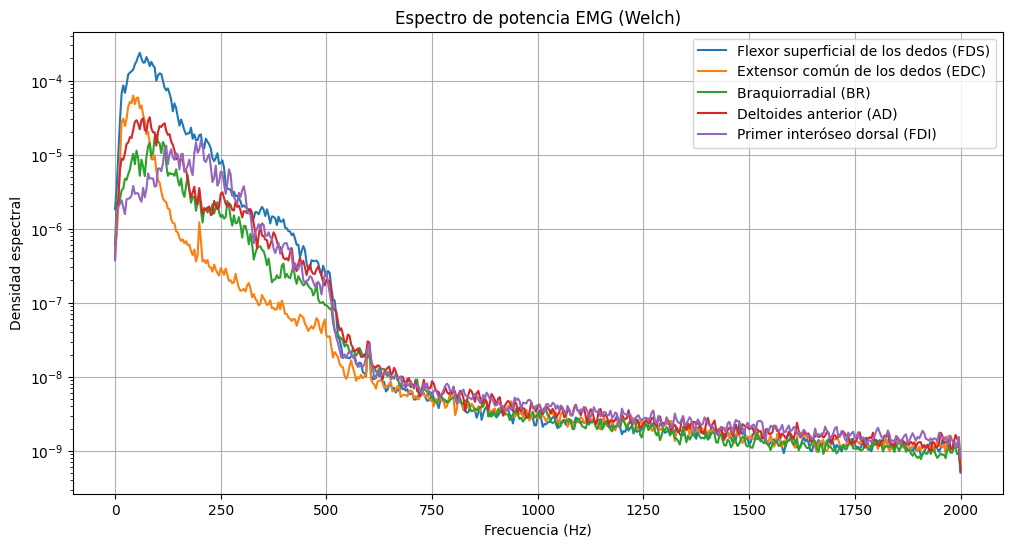

In [33]:
# 5. Espectro de potencia (Welch)
fs = int(1 / (t1[1] - t1[0]))  # frecuencia de muestreo
plt.figure(figsize=(12, 6))
for i in range(n_channels):
    f, Pxx = welch(emg1[:, i], fs=fs, nperseg=1024)
    plt.semilogy(f, Pxx, label=muscles[i])
plt.title("Espectro de potencia EMG (Welch)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral")
plt.legend()
plt.grid(True)
plt.show()

#### 6.  Boxplots por canal (distribución amplitudes)

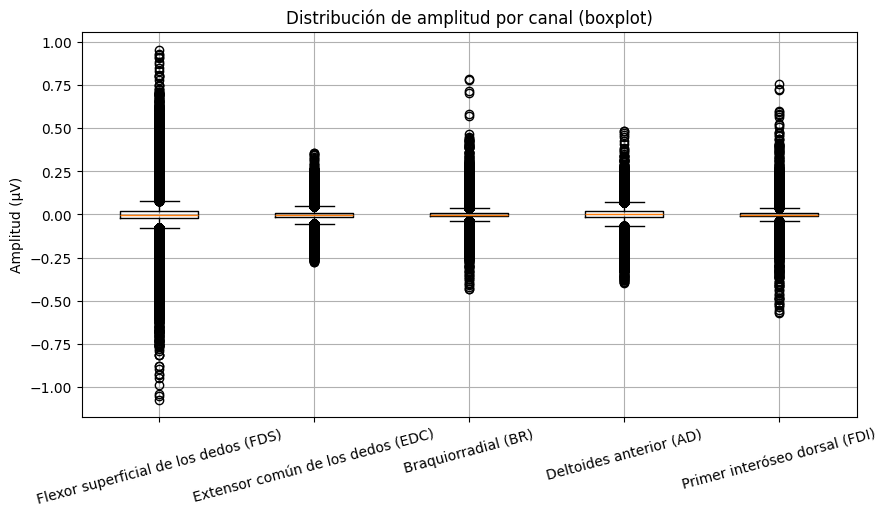

In [35]:
# 6. Boxplots por canal (distribución amplitudes)
plt.figure(figsize=(10, 5))
plt.boxplot([emg1[:, i] for i in range(n_channels)], tick_labels=muscles)
plt.title("Distribución de amplitud por canal (boxplot)")
plt.ylabel("Amplitud (µV)")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()